## Exploratory data analysis using pandas pivot table
In this notebook we shall briefly look at  [exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (EDA) using 
[an Excel style pivot table](https://support.microsoft.com/en-us/office/overview-of-pivottables-and-pivotcharts-527c8fa3-02c0-445a-a2db-7794676bce96) in pandas. We shall use the [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition as our example data.

First we shall import the [pandas data analysis library](https://pandas.pydata.org/) and read in the csv file to a [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html):

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
# read the training data into a pandas DataFrame
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

Let us take a look at the DataFrame:

In [3]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


We see that the csv file dataframe consists of 1459 rows by 81 columns.
We shall now create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html), and pass the *group key* `OverallQual`, which rates the overall material and finish of the house between 1 and 10.
(Note that we shall use the [pandas option](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) `('display.max_columns', None)` to show ***all*** of the columns, which are printed in numerical and then alphabetical order).

In [4]:
pivot_table = pd.pivot_table(train_data, index=['OverallQual'])
pd.set_option('display.max_columns', None)
# take a look
pivot_table

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
OverallQual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,619.000000,0.000000,0.000000,1.000000,175.000000,0.000000,0.500000,0.000000,166.500000,0.000000,0.000000,0.500000,0.000000,0.000000,NaN,619.000000,0.500000,455.000000,1.000000,7510.000000,50.000000,0.000000,25.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,50150.000000,0.000000,3.000000,341.500000,0.000000,1934.000000,1950.000000,2008.000000
2,572.666667,0.000000,0.000000,1.000000,113.333333,0.000000,0.333333,0.000000,231.333333,0.000000,0.333333,0.666667,184.666667,0.666667,1944.000000,572.666667,0.000000,885.000000,1.000000,7840.000000,53.666667,0.000000,26.666667,0.000000,0.000000,4.000000,0.000000,3.666667,0.000000,51770.333333,0.000000,3.666667,344.666667,0.000000,1935.000000,1950.000000,2008.000000
3,951.400000,142.100000,0.000000,2.450000,90.750000,0.000000,0.200000,0.000000,463.500000,52.400000,0.100000,1.300000,319.400000,1.200000,1955.285714,1119.150000,0.050000,819.550000,1.250000,8358.550000,66.235294,25.650000,50.000000,17.000000,50.500000,6.250000,23.400000,4.600000,0.000000,87473.750000,0.000000,5.900000,554.250000,31.050000,1932.700000,1964.550000,2008.000000
4,937.017241,162.405172,0.000000,2.534483,301.870690,19.500000,0.336207,0.008621,433.862069,24.887931,0.181034,1.181034,321.741379,1.163793,1963.388889,1106.672414,0.120690,758.422414,1.120690,8917.982759,59.857143,7.250000,58.750000,14.008621,49.568966,5.956897,25.543103,5.336207,0.000000,108420.655172,5.750000,5.500000,755.232759,55.258621,1948.284483,1968.000000,2007.982759
5,1063.566751,179.534005,2.307305,2.894207,424.073048,75.163728,0.435768,0.085642,430.302267,30.234257,0.362720,1.226700,384.025189,1.367758,1964.145205,1250.748111,0.226700,736.322418,1.090680,10153.352645,68.036036,7.647355,48.778338,44.030227,54.292191,6.395466,26.680101,5.874055,0.000000,133523.347607,10.634761,6.027708,929.539043,77.612091,1954.732997,1975.256927,2007.775819
6,1087.163102,372.462567,3.957219,2.906417,419.510695,56.058824,0.379679,0.085561,507.957219,21.965241,0.695187,1.524064,430.735294,1.689840,1973.132597,1465.874332,0.433155,728.037433,1.024064,10026.649733,67.347518,6.248663,64.104278,103.354839,70.133690,6.098930,43.187166,5.799465,5.245989,161603.034759,21.815508,6.339572,983.526738,85.863636,1967.636364,1981.395722,2007.855615
7,1186.507837,515.329154,6.134796,2.937304,391.225705,28.200627,0.404389,0.034483,689.087774,18.247649,0.733542,1.893417,532.849530,2.062696,1991.238994,1703.833856,0.536050,719.451411,1.012539,11075.799373,70.225564,1.996865,61.598746,105.707937,21.786834,6.225705,59.250784,5.404389,1.626959,207716.423197,15.109718,6.918495,1108.514107,100.934169,1988.269592,1996.326019,2007.786834
8,1462.767857,481.291667,3.720238,2.940476,585.303571,31.898810,0.529762,0.029762,800.684524,12.154762,0.934524,1.958333,681.732143,2.458333,1998.269461,1947.613095,0.511905,727.958333,1.000000,11103.839286,77.922535,3.553571,55.267857,211.538922,11.904762,7.178571,76.714286,5.226190,3.047619,274735.535714,16.208333,7.428571,1417.886905,134.869048,1996.821429,2001.244048,2007.708333
9,1741.372093,336.139535,0.000000,2.697674,856.883721,0.000000,0.674419,0.000000,877.511628,0.000000,1.186047,2.023256,753.697674,2.813953,2005.302326,2077.511628,0.465116,661.534884,1.000000,13424.186047,85.261905,0.000000,46.976744,345.720930,0.000000,6.395349,77.744186,4.930233,0.000000,367513.023256,19.023256,8.255814,1734.395349,210.883721,2005.116279,2005.813953,2007.976744


What does this give us; we have the 10 values for `OverallQual`, and the table has 37 numerical columns. 
We passed no aggregation function, so the default function was used, which is the [mean](https://en.wikipedia.org/wiki/Mean) (`numpy.mean`), to calculate the values in each of the *cells*.

We shall now use the `values` parameter to aggregate particular columns that we would like to look at. For example let us produce a dataframe consisting of the average values of the living area (`GrLivArea`), and the sales price (`SalePrice`):

In [5]:
pivot_table = pd.pivot_table(train_data, index=['OverallQual'], values=['GrLivArea','SalePrice'])
pivot_table

,GrLivArea,SalePrice
OverallQual,,
1,619.000000,50150.000000
2,572.666667,51770.333333
3,1119.150000,87473.750000
4,1106.672414,108420.655172
5,1250.748111,133523.347607
6,1465.874332,161603.034759
7,1703.833856,207716.423197
8,1947.613095,274735.535714
9,2077.511628,367513.023256


Finally, we can quickly produce a bar chart of our data. Here we shall look at the mean `SalePrice` for each of the `OverallQual`:

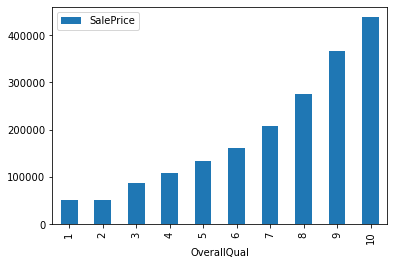

In [6]:
pivot_table = pd.pivot_table(train_data, index=['OverallQual'], values=['SalePrice'])
# now plot
pivot_table.plot(kind='bar');

As one can see, the pandas pivot table can be a very useful tool for quickly exploring a dataframe.
## Related reading:
* [pandas.pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) (pandas documentation)
* [pivot table](https://en.wikipedia.org/wiki/Pivot_table) (Wikipedia)